In [1084]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [1085]:
#loading the required libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

In [1086]:
#loading the dataset
traindf = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
testdf = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

# Exploration of The Datasets

In [1087]:
#first 5 rows of train dataset
traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1088]:
#first 5 rows of test dataset
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1089]:
#row and column size of train dataset
traindf.shape

(1460, 81)

In [1090]:
#row and column size of test dataset
testdf.shape

(1459, 80)

In [1091]:
traindf.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [1092]:
traindf.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [1093]:
#number of missing values in train dataset
#pd.options.display.max_rows= 81
traindf.isnull().sum().sum()

6965

In [1094]:
#number of missing values in test dataset
testdf.isnull().sum().sum()

7000

In [1095]:
#percentage of missing values per column in train dataset
pd.options.display.max_rows= 81
missing_percentage = traindf.isnull().sum()/len(traindf)*100
missing_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [1096]:
#percentage of missing values per column in train dataset
pd.options.display.max_rows= 81
missing_percentage = testdf.isnull().sum()/len(testdf)*100
missing_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinType2      2.878684
BsmtFinSF2        0.068540
B

In [1097]:
#columns with missing values in train dataset
missing_columns_train = traindf.loc[:,traindf.isnull().any()].columns
missing_columns_train

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [1098]:
#dropping the columns with more than 60% missing values in train dataset
traindf.dropna(thresh = len(traindf)*0.4 ,axis = 1,inplace=True)

In [1099]:
#dropping the columns with more than 60% missing values in test dataset
testdf.dropna(thresh = len(testdf)*0.4 ,axis = 1,inplace=True)

In [1100]:
traindf.shape

(1460, 77)

In [1101]:
#re-checking the columns with missing values in train dataset
missing_value_df_train = traindf.loc[:,traindf.isnull().any()]
missing_columns_train = missing_value_df_train.columns
missing_columns_train

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [1102]:
#re-checking the columns with missing values in test dataset
missing_value_df_test = testdf.loc[:,testdf.isnull().any()]
missing_columns_test = missing_value_df_test.columns
missing_columns_test

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [1103]:
#datatypes of columns with missing values in train dataset
missing_value_df_train.dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [1104]:
#percentage of missing values in columns with missing values in train dataset
missing_value_df_train.isnull().sum()/len(missing_value_df_train)*100

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [1105]:
#percentage of missing values in columns with missing values in test dataset
missing_value_df_test.isnull().sum()/len(missing_value_df_test)*100

MSZoning         0.274160
LotFrontage     15.558602
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
SaleType         0.068540
dtype: float64

In [1106]:
#FireplaceQu column elements
missing_value_df_train.FireplaceQu

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

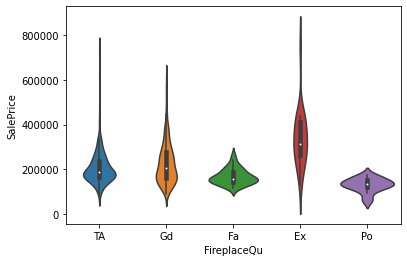

In [1107]:
sns.violinplot(traindf["FireplaceQu"],traindf["SalePrice"])

The violin plot shows different categories differetly distributed when compared with Saleprice so this feature must be useful and cannot be dropped and as, 47.26% rows of the column FireplaceQu are missing, so we will predict the column using suitable classification algorithm.

In [1108]:
print("Number of missing values in LotFrontage column in train dataset is :",traindf["LotFrontage"].isnull().sum())

Number of missing values in LotFrontage column in train dataset is : 259


In [1109]:
print("Number of missing values in LotFrontage column in test dataset is :",testdf["LotFrontage"].isnull().sum())

Number of missing values in LotFrontage column in test dataset is : 227


The count of missing values of the column in LotFrontage column is high for both the train and test dataset, we will impute the values with values within 3 standard deviation's from the mean of the available values of the column.

# Missing Value Imputaion and Categorical Features Encoding

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

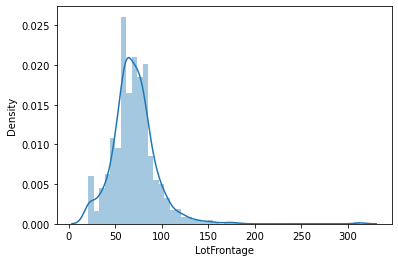

In [1110]:
sns.distplot(traindf["LotFrontage"])

As, the distribution of the attribute LotFrontage is approximiately normal so we can impute the missing values using the empirical rule of normal distribution which states 99.7% of population values lies within three standard deviations away from mean.

In [1111]:
import random as rand
#treating missing values in LotFrontage column in train dataset
lot_mean = traindf["LotFrontage"].mean()
lot_sd = traindf["LotFrontage"].std()
random_numbers = list()
for i in range(259):
    random_numbers.append(rand.uniform(lot_mean-3*lot_sd,lot_mean+3*lot_sd))
#imputing missing values of LotFrontage column with random_numbers with values between 3 sample sd's of LotFrontage column
traindf.loc[traindf["LotFrontage"].isnull(),"LotFrontage"] = random_numbers

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

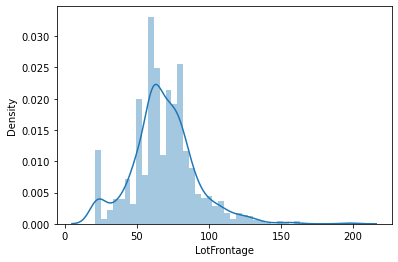

In [1112]:
sns.distplot(testdf["LotFrontage"])

The attribute LotFrontage also follows normal distribution in testdf, so we can do the same thing once again for missing values of LotFrontage attribute of testdf.

In [1113]:
import random as rand
#treating missing values in LotFrontage column in test data
lot_mean = testdf["LotFrontage"].mean()
lot_sd = testdf["LotFrontage"].std()
random_numbers1 = list()
for i in range(227):
    random_numbers1.append(rand.uniform(lot_mean-3*lot_sd,lot_mean+3*lot_sd))
#imputing missing values of LotFrontage column with random_numbers with values between 3 sample sd's of LotFrontage column in test dataset
testdf.loc[testdf["LotFrontage"].isnull(),"LotFrontage"] = random_numbers1

The column "GarageYrBlt" refers to the year when Garage of a particular house was built. It is better to replace the missing values of that column with median value of the available values of the column as it is referring to a Year.

The column "MasVnrArea" is referring to Masonry veneer area in square feet. As, the missing values are refering to area so it will be better to replace them with mean of the available values from that column.


In [1114]:
testdf.shape

(1459, 76)

In [1115]:
#filling missing values of GarageYrBlt column with the column's median value in train dataset.
traindf["GarageYrBlt"].fillna(traindf["GarageYrBlt"].median(),inplace=True)
#filling missing values of MasVnrArea column with the column's mean value in train dataset.
traindf["MasVnrArea"].fillna(traindf["MasVnrArea"].mean(),inplace=True)

In [1116]:
#datatypes of columns with missing values in train dataset
missing_value_df_test.dtypes

MSZoning         object
LotFrontage     float64
Utilities        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
SaleType         object
dtype: object

Checking the test dataset we see that the columns "BsmtFullBath","BsmtHalfBath","GarageCars" represents categorical features which are better taken care of by replacing with mode and the columns "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","GarageArea" represnts area.So it is better to impute them by their mean.

In [1117]:
impute_mean = ["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","GarageArea"]
impute_mode = ["BsmtFullBath","BsmtHalfBath","GarageCars"]
#filling missing values of GarageYrBlt column with the column's median value in test dataset.
testdf["GarageYrBlt"].fillna(traindf["GarageYrBlt"].median(),inplace=True)
#filling missing values of columns in impute_mean with each of the column's mean value in dataset.
for columns in impute_mean:
    testdf[columns].fillna(traindf[columns].mean(),inplace=True)
for columns in impute_mode:
    testdf[columns].fillna(traindf[columns].mode(),inplace=True)

In [1118]:
missing_value_df_train = traindf.loc[:,traindf.isnull().any()]
missing_value_columns_train = list(missing_value_df_train.columns)
#prints reamining missing value columns except FireplaceQu
missing_value_columns1_train = [x for x in missing_value_columns_train if x!= "FireplaceQu"]
missing_value_columns1_train

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [1119]:
missing_value_df_test = testdf.loc[:,testdf.isnull().any()]
missing_value_columns_test = list(missing_value_df_test.columns)
#prints reamining missing value columns except FireplaceQu
missing_value_columns1_test = [x for x in missing_value_columns_test if x!= "FireplaceQu"]
missing_value_columns1_test

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'SaleType']

Now, all the missing value columns with object datatypes are left to be treated. We are going to replace the missing values with mode for all these columnn except the FireplaceQu column as we are going to run a classification model to predict this column.

In [1120]:
#replacing missing value columns with their respective modes except the FireplaceQu column in train dataset
for columns in missing_value_columns1_train:
    traindf[columns].fillna(traindf[columns].mode()[0],inplace=True)
traindf.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [1121]:
#replacing missing value columns with their respective modes except the FireplaceQu column in test dataset
for columns in missing_value_columns1_test:
    testdf[columns].fillna(testdf[columns].mode()[0],inplace=True)
testdf.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [1122]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
#selecting categorical columns to encode from train dataset
cat_columns_train = list(traindf.select_dtypes("object").columns)
#as the column FireplaceQu has NaN values so it cannot be imputed directly, so we are removing it from the list
cat_columns_train = [x for x in cat_columns_train if x!= "FireplaceQu"]
#setting up the imputer
transformer = ColumnTransformer(transformers=[("L",OrdinalEncoder(),cat_columns_train)],remainder='passthrough')
cat_columns_imputed_train = transformer.fit_transform(traindf[cat_columns_train])
#pasting the imputed values in the each of the categorical columns of the original train dataset
traindf[cat_columns_train] = cat_columns_imputed_train

In [1123]:
#selecting categorical columns to encode from test dataset
cat_columns_test = list(testdf.select_dtypes("object").columns)
#as the column FireplaceQu has NaN values so it cannot be imputed directly, so we are removing it from the list
cat_columns_test = [x for x in cat_columns_test if x!= "FireplaceQu"]
#setting up the imputer
transformer = ColumnTransformer(transformers=[("L",OrdinalEncoder(),cat_columns_test)],remainder='passthrough')
cat_columns_imputed_test = transformer.fit_transform(testdf[cat_columns_test])
#pasting the imputed values in the each of the categorical columns of the original test dataset
testdf[cat_columns_test] = cat_columns_imputed_test

In [1124]:
#encoding the non-null values of FireplaceQu column in train dataset
encoder = OrdinalEncoder()
non_null_train = traindf["FireplaceQu"].dropna()
encoded_train = encoder.fit_transform(np.array(non_null_train).reshape(-1,1))
traindf.loc[traindf["FireplaceQu"].notnull(),"FireplaceQu"] = np.squeeze(encoded_train)

In [1125]:
#encoding the non-null values of FireplaceQu column in test dataset
encoder = OrdinalEncoder()
non_null_test = testdf["FireplaceQu"].dropna()
encoded_test = encoder.fit_transform(np.array(non_null_test).reshape(-1,1))
testdf.loc[testdf["FireplaceQu"].notnull(),"FireplaceQu"] = np.squeeze(encoded_test)

In [1126]:
#KNN imputing the FireplaceQu column of train dataset
!pip install fancyimpute
from fancyimpute import KNN
##KNN imputing the FireplaceQu column of train dataset
imputer = KNN(k=5)
FireplaceQu_imputed = imputer.fit_transform(np.array(traindf["FireplaceQu"]).reshape(-1,1))
traindf["FireplaceQu"] = FireplaceQu_imputed

Imputing row 1/1460 with 1 missing, elapsed time: 0.142
Imputing row 101/1460 with 0 missing, elapsed time: 0.143
Imputing row 201/1460 with 1 missing, elapsed time: 0.144
Imputing row 301/1460 with 0 missing, elapsed time: 0.145
Imputing row 401/1460 with 0 missing, elapsed time: 0.146
Imputing row 501/1460 with 1 missing, elapsed time: 0.147
Imputing row 601/1460 with 0 missing, elapsed time: 0.148
Imputing row 701/1460 with 0 missing, elapsed time: 0.149
Imputing row 801/1460 with 1 missing, elapsed time: 0.150
Imputing row 901/1460 with 1 missing, elapsed time: 0.151
Imputing row 1001/1460 with 1 missing, elapsed time: 0.153
Imputing row 1101/1460 with 1 missing, elapsed time: 0.154
Imputing row 1201/1460 with 1 missing, elapsed time: 0.155
Imputing row 1301/1460 with 0 missing, elapsed time: 0.156
Imputing row 1401/1460 with 0 missing, elapsed time: 0.157
[KNN] Warning: 690/1460 still missing after imputation, replacing with 0


All the missing values are imputed and all the categorical columns are encoded. Now, we can fit the models.

In [1127]:
#KNN imputing the FireplaceQu column of test dataset
imputer = KNN(k=5)
FireplaceQu_imputed = imputer.fit_transform(np.array(testdf["FireplaceQu"]).reshape(-1,1))
testdf["FireplaceQu"] = FireplaceQu_imputed

Imputing row 1/1459 with 1 missing, elapsed time: 0.126
Imputing row 101/1459 with 1 missing, elapsed time: 0.127
Imputing row 201/1459 with 0 missing, elapsed time: 0.128
Imputing row 301/1459 with 0 missing, elapsed time: 0.129
Imputing row 401/1459 with 1 missing, elapsed time: 0.130
Imputing row 501/1459 with 1 missing, elapsed time: 0.131
Imputing row 601/1459 with 0 missing, elapsed time: 0.132
Imputing row 701/1459 with 0 missing, elapsed time: 0.133
Imputing row 801/1459 with 1 missing, elapsed time: 0.134
Imputing row 901/1459 with 1 missing, elapsed time: 0.135
Imputing row 1001/1459 with 1 missing, elapsed time: 0.136
Imputing row 1101/1459 with 0 missing, elapsed time: 0.137
Imputing row 1201/1459 with 0 missing, elapsed time: 0.138
Imputing row 1301/1459 with 0 missing, elapsed time: 0.139
Imputing row 1401/1459 with 1 missing, elapsed time: 0.140
[KNN] Warning: 730/1459 still missing after imputation, replacing with 0


Features with too low or too high correlation is not relevant.

In [1128]:
#checking if Id column is relevant
traindf["Id"].corr(traindf["SalePrice"])

-0.021916719443431116

Dropping the Id column in both train and test dataset as they are irrelevant.

In [1129]:
traindf.drop("Id",axis=1,inplace=True)
testdf.drop("Id",axis=1,inplace=True)

# Model Fitting

In [1130]:
#Setting predictior and target Variables
X = traindf.iloc[:,:75]
y = traindf["SalePrice"]

In [1131]:
#splitting the dataset in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [1132]:
#fitting decision tree model and checking accuracy
model0 = DecisionTreeRegressor()
model0.fit(X_train,y_train)
y_pred = model0.predict(X_test)
mae_0 = mean_absolute_error(y_test,y_pred)
rmse_0 = np.sqrt(mean_squared_error(y_test,y_pred))
r_squared_0 = r2_score(y_test,y_pred)
print("Root mean square error : ",rmse_0)
print("Mean absolute error : ",mae_0)
print("r squared : ",r_squared_0)

Root mean square error :  35873.43369083238
Mean absolute error :  24042.70890410959
r squared :  0.800938040015599


In [1133]:
#fitting Random Forest model and checking accuracy
model1 = RandomForestRegressor(n_estimators=100,random_state=2)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
mae_1 = mean_absolute_error(y_test,y_pred)
rmse_1 = np.sqrt(mean_squared_error(y_test,y_pred))
r_squared_1 = r2_score(y_test,y_pred)
print("Root mean square error : ",rmse_1)
print("Mean absolute error : ",mae_1)
print("r squared : ",r_squared_1)

Root mean square error :  25117.32084732736
Mean absolute error :  16687.181438356165
r squared :  0.9024136652726107


In [1134]:
#fitting Linear Regression model and checking accuracy
model2 = LinearRegression()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
mae_2 = mean_absolute_error(y_test,y_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test,y_pred))
r_squared_2 = r2_score(y_test,y_pred)
print("Root mean square error : ",rmse_2)
print("Mean absolute error : ",mae_2)
print("r squared : ",r_squared_2)

Root mean square error :  28945.093142880363
Mean absolute error :  19866.30160883719
r squared :  0.8704037954005304


In [1135]:
#fitting the XGBoost Regressor model
from xgboost import XGBRegressor
model3 = XGBRegressor(eta=0.1)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
mae_3 = mean_absolute_error(y_test,y_pred)
rmse_3 = np.sqrt(mean_squared_error(y_test,y_pred))
r_squared_3 = r2_score(y_test,y_pred)
print("Root mean square error : ",rmse_3)
print("Mean absolute error : ",mae_3)
print("r squared : ",r_squared_3)

Root mean square error :  23214.22001879368
Mean absolute error :  15561.83575021404
r squared :  0.9166413692114682


# Visualization of Accuracy Scores of Different Models

In [1136]:
#storing the scores in a dataframe to plot a graph
plotdf = pd.DataFrame({"Models":["Decision Tree","Random Forest","Linear Regression","XGBoost Regressor"],
                      "RMSE":[rmse_0,rmse_1,rmse_2,rmse_3],"MAE":[mae_0,mae_1,mae_2,mae_3],
                      "R-Squared":[r_squared_0,r_squared_1,r_squared_2,r_squared_3]})
plotdf

,Models,RMSE,MAE,R-Squared
0,Decision Tree,35873.433691,24042.708904,0.800938
1,Random Forest,25117.320847,16687.181438,0.902414
2,Linear Regression,28945.093143,19866.301609,0.870404
3,XGBoost Regressor,23214.220019,15561.835750,0.916641


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Linear Regression'),
  Text(3, 0, 'XGBoost Regressor')])

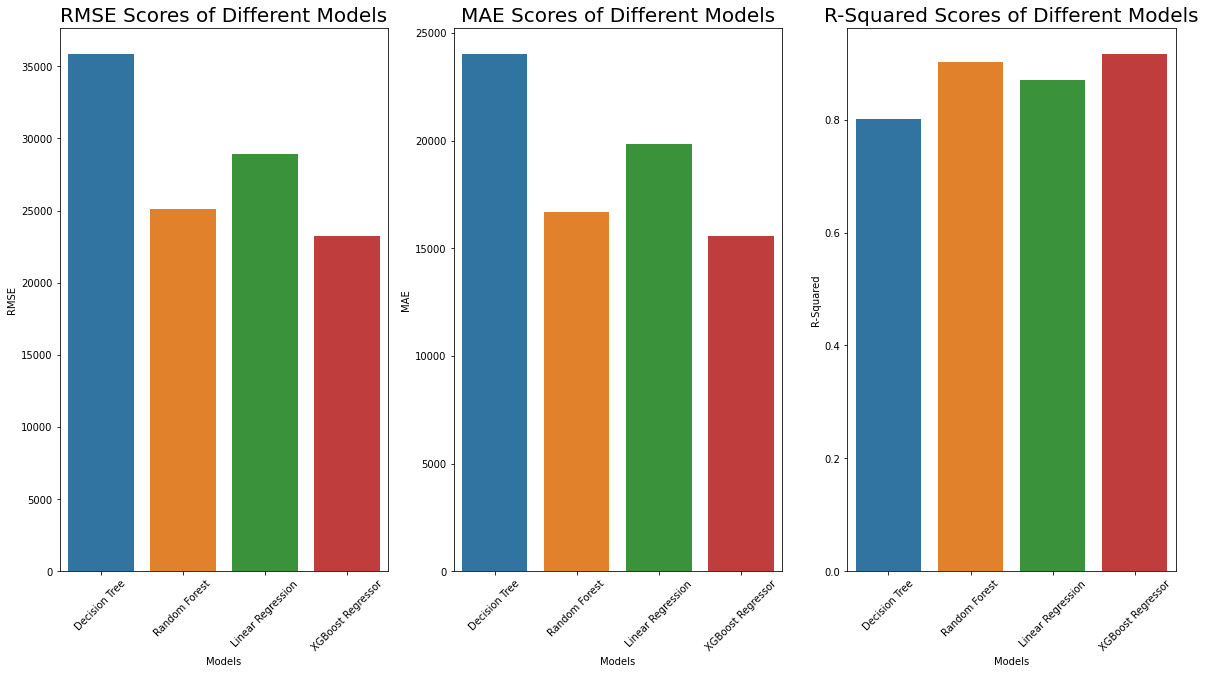

In [1137]:
#representing the results with graph
plt.figure(figsize=(20,10))
plt.subplot(131)
sns.barplot(x="Models",y="RMSE",data=plotdf)
plt.title("RMSE Scores of Different Models",size=20)
plt.xticks(rotation=45,size=10)
plt.subplot(132)
sns.barplot(x="Models",y="MAE",data=plotdf)
plt.title("MAE Scores of Different Models",size=20)
plt.xticks(rotation=45,size=10)
plt.subplot(133)
sns.barplot(x="Models",y="R-Squared",data=plotdf)
plt.title("R-Squared Scores of Different Models",size=20)
plt.xticks(rotation=45,size=10)

We can see the XGBoost Regressor model performed best having the lowest MAE and RMSE values along with highest R-Squared value of 0.92.
So now we are going to predict the House Pricings on the test data using the XGBoost model and save the result.

# Final Prediction Using Test Dataset

In [1138]:
#predicting the result using test dataset
y_pred_test = model3.predict(testdf)
y_pred_test

array([122021.06, 153517.58, 180928.75, ..., 152203.06, 113079.62,
       232103.4 ], dtype=float32)

In [1139]:
#storing the result
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission["SalePrice"] = y_pred_test

In [1140]:
#saving the file
submission.to_csv("submission.csv",index=False)